<a href="https://colab.research.google.com/github/1729David/fast.ai.deeplearning.v3/blob/master/dj_lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [0]:
??torch.ones

In [13]:
test = torch.ones(5,3) ## a 5 by 3 matrix
test

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [14]:
test[:4,1] = 3.; test  ## update cells in the first four rows of the second column

tensor([[1., 3., 1.],
        [1., 3., 1.],
        [1., 3., 1.],
        [1., 3., 1.],
        [1., 1., 1.]])

In [15]:
test = torch.ones(2,5,3); test

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

In [16]:
test[0:3,2] = 2.; test  ## not quite certain about how indexing works in this scenario.

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [2., 2., 2.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [2., 2., 2.],
         [1., 1., 1.],
         [1., 1., 1.]]])

In [4]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.0473,  1.0000],
        [ 0.5465,  1.0000],
        [ 0.9449,  1.0000],
        [-0.2250,  1.0000],
        [-0.8015,  1.0000]])

In [5]:
a = tensor(3.,2); a

tensor([3., 2.])

In [6]:
a.size()

torch.Size([2])

In [7]:
(x@a).size()  ## (100 X 2) @ (2 X 1) -> 100 X 1

torch.Size([100])

In [8]:
x@a

tensor([ 2.1418,  3.6394,  4.8346,  1.3251, -0.4046,  4.0066, -0.6463,  4.9601,
         4.9880,  1.4142, -0.3555,  0.2007,  4.0854, -0.5161,  2.7143,  1.6769,
         0.5486,  0.2461,  2.8358,  0.8958, -0.2406,  1.1629, -0.3582,  4.5163,
         3.7867,  0.1389,  3.8935, -0.1892,  3.8926,  2.9379,  3.3523,  3.1298,
         2.0342,  2.9581,  4.4572,  3.1191,  1.3899,  4.3954, -0.5446,  4.7496,
         2.7071,  2.8454,  2.9687,  2.0126,  2.1706,  0.2013,  1.5176,  3.5759,
         2.2373, -0.2855,  4.8366,  4.3578,  4.1140,  2.6511,  4.4603,  0.0597,
         2.3067,  0.9085,  2.7758,  0.6963,  4.6888,  4.2406,  1.9891,  2.5425,
         4.0435,  0.5243,  0.1142,  0.4009,  1.6226, -0.3724,  3.6634,  2.9721,
         4.6650,  4.2688, -0.3307,  4.2929,  0.8478,  1.2338,  3.3752,  3.6350,
         2.0346,  1.8536, -0.5688,  3.9744,  4.6230,  3.4222,  3.5007,  0.8204,
         3.0547,  2.6892,  1.7653,  0.3126,  2.6259,  0.8146,  2.6897, -0.0340,
        -0.0278,  0.5915,  3.7522, -0.70

In [0]:
y = x@a + torch.rand(n)

In [10]:
y

tensor([ 2.3180,  3.7809,  5.4775,  1.8360,  0.2895,  4.4166, -0.5545,  5.1028,
         5.3092,  2.4106,  0.2483,  0.2633,  4.6997,  0.3701,  3.6990,  1.7887,
         1.4519,  1.2140,  2.8520,  0.9051,  0.3357,  1.6865,  0.4604,  5.3571,
         3.9222,  0.4791,  4.2538,  0.6721,  3.9228,  3.5465,  3.8352,  3.5467,
         2.3004,  3.2069,  4.5898,  3.7867,  1.7604,  5.1942, -0.0716,  4.7945,
         3.4155,  3.4825,  3.2203,  2.2462,  3.0375,  1.1327,  2.2351,  3.6092,
         2.4409, -0.1854,  5.7250,  4.8014,  4.3590,  3.4542,  4.8039,  0.3624,
         3.2618,  1.4100,  3.3607,  1.3625,  5.1646,  5.1699,  2.0928,  2.6761,
         4.3868,  1.0336,  0.4495,  1.0077,  1.7252,  0.3846,  4.2486,  3.2769,
         4.9247,  4.7070,  0.4783,  4.3541,  1.0425,  1.6272,  3.5306,  4.3380,
         2.4760,  2.5360,  0.3464,  4.5920,  5.3038,  4.0013,  4.4996,  1.3727,
         3.0907,  3.1332,  2.7451,  0.5337,  2.6353,  1.1418,  3.4454,  0.3795,
         0.5402,  0.6958,  4.4868, -0.13

In [11]:
x[:,0]

tensor([ 0.0473,  0.5465,  0.9449, -0.2250, -0.8015,  0.6689, -0.8821,  0.9867,
         0.9960, -0.1953, -0.7852, -0.5998,  0.6951, -0.8387,  0.2381, -0.1077,
        -0.4838, -0.5846,  0.2786, -0.3681, -0.7469, -0.2790, -0.7861,  0.8388,
         0.5956, -0.6204,  0.6312, -0.7297,  0.6309,  0.3126,  0.4508,  0.3766,
         0.0114,  0.3194,  0.8191,  0.3730, -0.2034,  0.7985, -0.8482,  0.9165,
         0.2357,  0.2818,  0.3229,  0.0042,  0.0569, -0.5996, -0.1608,  0.5253,
         0.0791, -0.7618,  0.9455,  0.7859,  0.7047,  0.2170,  0.8201, -0.6468,
         0.1022, -0.3638,  0.2586, -0.4346,  0.8963,  0.7469, -0.0036,  0.1808,
         0.6812, -0.4919, -0.6286, -0.5330, -0.1258, -0.7908,  0.5545,  0.3240,
         0.8883,  0.7563, -0.7769,  0.7643, -0.3841, -0.2554,  0.4584,  0.5450,
         0.0115, -0.0488, -0.8563,  0.6581,  0.8743,  0.4741,  0.5002, -0.3932,
         0.3516,  0.2297, -0.0782, -0.5625,  0.2086, -0.3951,  0.2299, -0.6780,
        -0.6759, -0.4695,  0.5841, -0.90

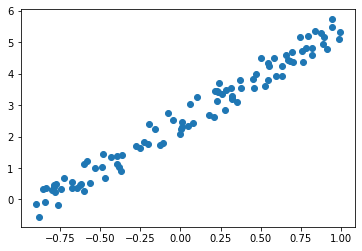

In [12]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [15]:
y_hat = x@a
mse(y_hat, y)

tensor(8.2142)

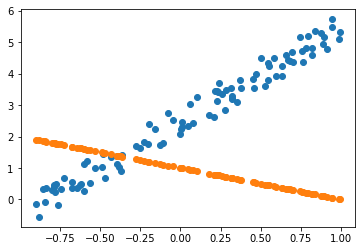

In [16]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [17]:
a = nn.Parameter(a); a
#a.requires_grad_(False) # this causes an error later on when doing the up

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [19]:
lr = 1e-1
for t in range(100): update()

tensor(8.2142, grad_fn=<MeanBackward0>)
tensor(1.3172, grad_fn=<MeanBackward0>)
tensor(0.3905, grad_fn=<MeanBackward0>)
tensor(0.1618, grad_fn=<MeanBackward0>)
tensor(0.1032, grad_fn=<MeanBackward0>)
tensor(0.0881, grad_fn=<MeanBackward0>)
tensor(0.0842, grad_fn=<MeanBackward0>)
tensor(0.0832, grad_fn=<MeanBackward0>)
tensor(0.0830, grad_fn=<MeanBackward0>)
tensor(0.0829, grad_fn=<MeanBackward0>)


In [26]:
#plt.scatter(x[:,0],y)
#plt.scatter(x[:,0],x@a)
vg = tensor(x@a).detach() #without doing this, the chart for x@a would not render
vg

tensor([ 2.6188e+00,  4.0785e+00,  5.2434e+00,  1.8228e+00,  1.3687e-01,
         4.4364e+00, -9.8672e-02,  5.3658e+00,  5.3930e+00,  1.9096e+00,
         1.8473e-01,  7.2685e-01,  4.5132e+00,  2.8174e-02,  3.1768e+00,
         2.1656e+00,  1.0660e+00,  7.7111e-01,  3.2953e+00,  1.4044e+00,
         2.9673e-01,  1.6647e+00,  1.8207e-01,  4.9332e+00,  4.2221e+00,
         6.6659e-01,  4.3262e+00,  3.4686e-01,  4.3252e+00,  3.3948e+00,
         3.7986e+00,  3.5818e+00,  2.5139e+00,  3.4145e+00,  4.8756e+00,
         3.5714e+00,  1.8860e+00,  4.8153e+00,  4.5705e-04,  5.1606e+00,
         3.1698e+00,  3.3046e+00,  3.4247e+00,  2.4929e+00,  2.6469e+00,
         7.2747e-01,  2.0104e+00,  4.0166e+00,  2.7118e+00,  2.5298e-01,
         5.2454e+00,  4.7787e+00,  4.5411e+00,  3.1152e+00,  4.8786e+00,
         5.8947e-01,  2.7796e+00,  1.4167e+00,  3.2367e+00,  1.2099e+00,
         5.1014e+00,  4.6645e+00,  2.4700e+00,  3.0094e+00,  4.4724e+00,
         1.0423e+00,  6.4255e-01,  9.2195e-01,  2.1

In [27]:
x@a

tensor([ 2.6188e+00,  4.0785e+00,  5.2434e+00,  1.8228e+00,  1.3687e-01,
         4.4364e+00, -9.8672e-02,  5.3658e+00,  5.3930e+00,  1.9096e+00,
         1.8473e-01,  7.2685e-01,  4.5132e+00,  2.8174e-02,  3.1768e+00,
         2.1656e+00,  1.0660e+00,  7.7111e-01,  3.2953e+00,  1.4044e+00,
         2.9673e-01,  1.6647e+00,  1.8207e-01,  4.9332e+00,  4.2221e+00,
         6.6659e-01,  4.3262e+00,  3.4686e-01,  4.3252e+00,  3.3948e+00,
         3.7986e+00,  3.5818e+00,  2.5139e+00,  3.4145e+00,  4.8756e+00,
         3.5714e+00,  1.8860e+00,  4.8153e+00,  4.5705e-04,  5.1606e+00,
         3.1698e+00,  3.3046e+00,  3.4247e+00,  2.4929e+00,  2.6469e+00,
         7.2747e-01,  2.0104e+00,  4.0166e+00,  2.7118e+00,  2.5298e-01,
         5.2454e+00,  4.7787e+00,  4.5411e+00,  3.1152e+00,  4.8786e+00,
         5.8947e-01,  2.7796e+00,  1.4167e+00,  3.2367e+00,  1.2099e+00,
         5.1014e+00,  4.6645e+00,  2.4700e+00,  3.0094e+00,  4.4724e+00,
         1.0423e+00,  6.4255e-01,  9.2195e-01,  2.1

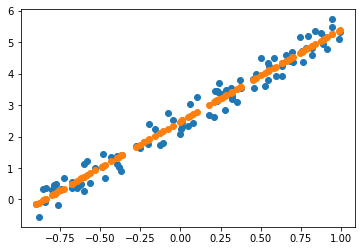

In [28]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],vg)

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [31]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], (x@a).detach()) # modified code to use .detach(); otherwise the animation would not run.
plt.close()

def animate(i):
    update()
    line.set_ydata((x@a).detach()) # modified code to use .detach(); otherwise the animation would not run.
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.